In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_process import load_calculation_data
import astropy.units as u
from astropy.cosmology import Planck18 as cosmos
import astropy.coordinates as coo
h = cosmos.H0.value/100

In [2]:
z = 0
scale_factor = cosmos.Om(z) * cosmos.critical_density(z).to('M_sun/pc^3').value / h**2 * 1e6

In [3]:
r_p, _ = load_calculation_data(f'../calculation_data/result_r=3_100_15_quasar_lss_all_CMB_lcut_2048_tree.npy', return_rp=True)

In [4]:
# jackknife_auto = np.load('./auto_corr_jackknife_nside_10.npy')
# jackknife_cross = np.load('./cross_corr_jackknife_nside_10.npy')
jackknife_auto = np.load('./auto_corr_jackknife_kmeans_100.npy')
jackknife_cross = np.load('./cross_corr_jackknife_kmeans_100.npy')
jackknife_auto*=scale_factor

In [5]:
jackknife_all = np.concatenate((jackknife_cross, jackknife_auto), axis=1)

In [6]:
cov = np.cov(jackknife_all, rowvar=False, ddof=0)
cov *= (jackknife_all.shape[0] - 1)

In [7]:
std = np.sqrt([cov[i,i] for i in range(len(cov))])

In [8]:
cov_normed = cov / (std.reshape((-1, 1)) @ std.reshape((1, -1)))

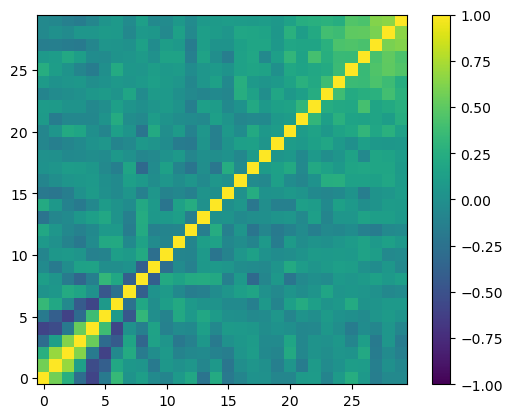

In [9]:
plt.imshow(cov_normed, origin='lower', vmin=-1, vmax=1)
plt.colorbar()

In [10]:
w_auto = jackknife_auto.mean(axis=0)
w_cross = jackknife_cross.mean(axis=0)
std_auto = std[len(w_cross):]
std_cross = std[:len(w_cross)]

[]

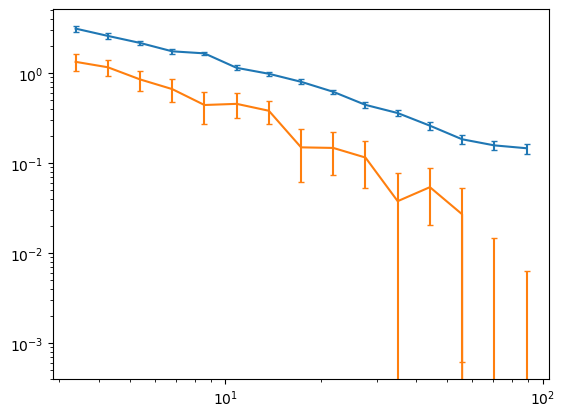

In [12]:
plt.errorbar(r_p, w_auto, std_auto, capsize=2)
plt.errorbar(r_p, w_cross, std_cross, capsize=2)
# plt.ylim(bottom=1e-2)
plt.loglog()